0.25580811252040686


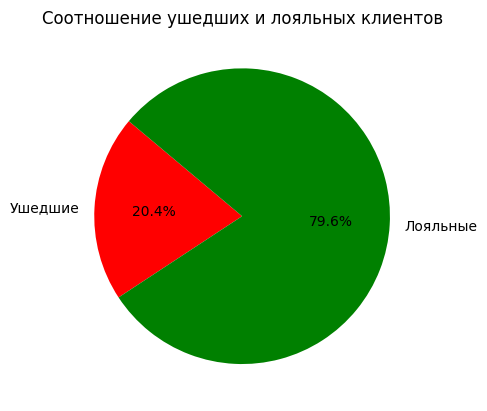

In [10]:

#RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
#CustomerId — идентификатор клиента
#Surname — фамилия клиента
#CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
#Geography — страна клиента (банк международный)
#Gender — пол клиента
#Age — возраст клиента
#Tenure — сколько лет клиент пользуется услугами банка
#Balance — баланс на счетах клиента в банке
#NumOfProducts — количество услуг банка, которые приобрёл клиент
#HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
#IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
#EstimatedSalary — предполагаемая заработная плата клиента
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

# #Задание 1.Каково соотношение ушедших и лояльных клиентов
import pandas as pd
import matplotlib.pyplot as plt
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
loyal_customers=clients_base[clients_base['Exited']==0]
churned_customers=clients_base[clients_base['Exited']==1]
ratio=len(churned_customers)/len(loyal_customers)
print(ratio)
#Диаграмма
labels=['Ушедшие', 'Лояльные']
sizes=[len(churned_customers), len(loyal_customers)]
colors=['red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()


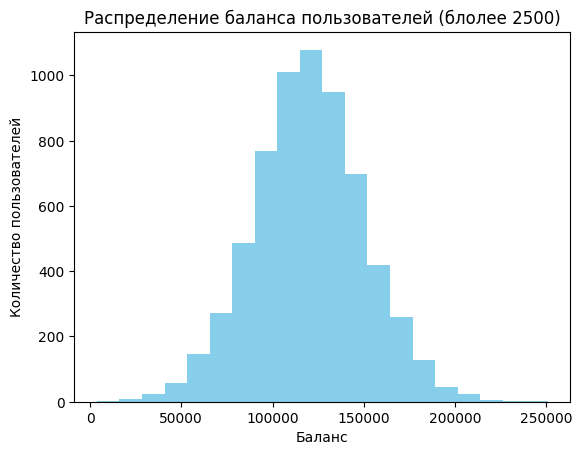

[6383, 3617]


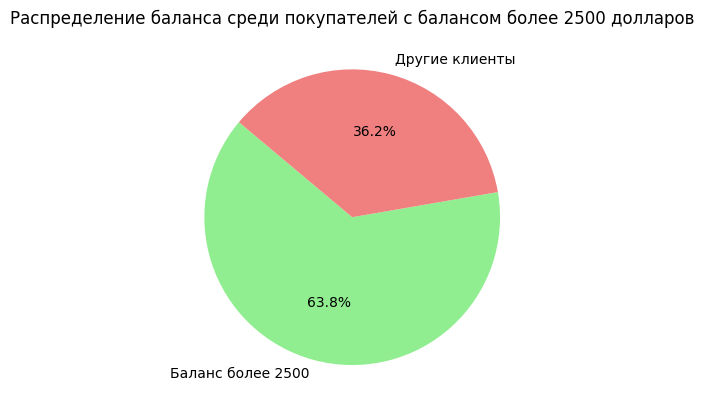

In [15]:
#Задание2
#Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
import pandas as pd
import matplotlib.pyplot as plt
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
filtered_data=clients_base[clients_base['Balance']>2500]
plt.hist(filtered_data['Balance'], bins=20, color='skyblue')
plt.xlabel('Баланс')
plt.ylabel('Количество пользователей')
plt.title('Распределение баланса пользователей (блолее 2500)')
plt.show()

num_clients=len(filtered_data)
sizes=[num_clients, len(clients_base)-num_clients]
labels=['Баланс более 2500'.format(num_clients), 'Другие клиенты']
colors=['lightgreen','lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title ('Распределение баланса среди покупателей с балансом более 2500 долларов')
plt.show()


#Выводы:
#1. Самое большое количество клиентов (более 1000) те, которые имеют около 125000 долларов на балансе.
#2. Основные клиенты имеют на счету 50000--200000 долларов
#3. 64% наших клиентов имеют болоьее 2500 долларов на балансе
    

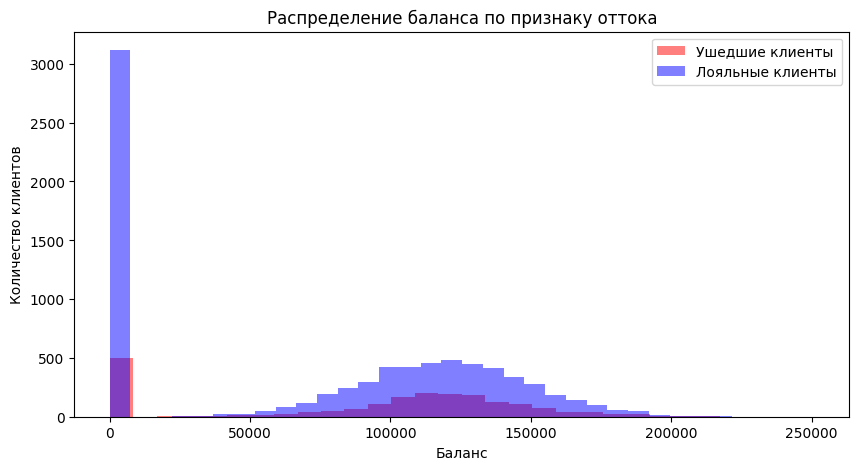

In [21]:
#3 Задание
#Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
# одумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
import pandas as pd
import matplotlib.pyplot as plt
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
loyal_customers=clients_base[clients_base['Exited']==0]
churned_customers=clients_base[clients_base['Exited']==1]
plt.figure(figsize=(10,5))
plt.hist(churned_customers['Balance'], bins=30, alpha = 0.5, color='red', label='Ушедшие клиенты' )
plt.hist(loyal_customers['Balance'], bins=30, alpha = 0.5, color='blue', label='Лояльные клиенты' )
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.title('Распределение баланса по признаку оттока')
plt.legend()
plt.show()
#Выводы:
# Балас 0 имеют более 3000 лояльных клиентов, и лишь 500 - ушли.
# В остальном сумма баланса ушедших клиентов прямо пропорциональна сумме баланса лояльных клиентов (причем, очевидно, что лояльных клиентов больше примерно в 2 раза)


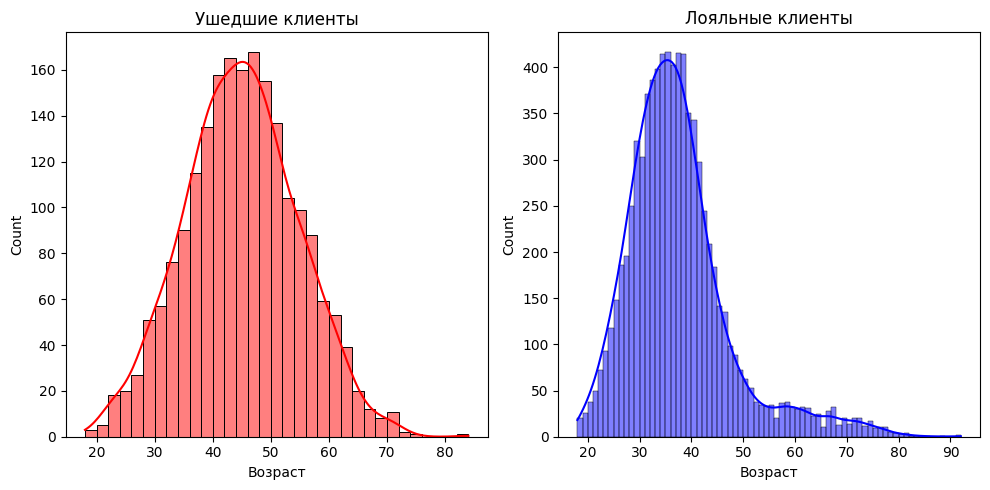

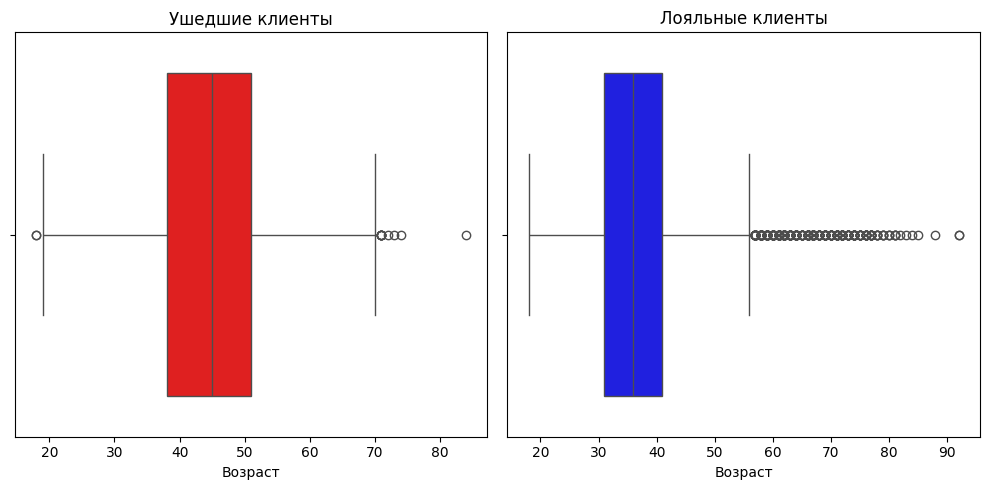

In [31]:
# задание 4
#Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
clients_base=pd.read_csv('C:/Users/HONOR/OneDrive/Рабочий стол/IDE/Bank/churn.csv', sep=',')
clients_base['Age']=pd.to_numeric(clients_base['Age'])
loyal_customers=clients_base[clients_base['Exited']==0]
churned_customers=clients_base[clients_base['Exited']==1]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(churned_customers['Age'], kde=True, color='red')
plt.title('Ушедшие клиенты')
plt.xlabel('Возраст')

plt.subplot(1,2,2)
sns.histplot(loyal_customers['Age'], kde=True, color='Blue')
plt.title('Лояльные клиенты')
plt.xlabel('Возраст')

plt.tight_layout()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='Age', data=churned_customers, color='red')
plt.title('Ушедшие клиенты')
plt.xlabel('Возраст')

plt.subplot(1,2,2)
sns.boxplot(x='Age', data=loyal_customers, color='blue')
plt.title('Лояльные клиенты')
plt.xlabel('Возраст')
plt.tight_layout()
plt.show()
#Выводы:
#Ушедшие клиенты пиковый возрась 40-50 лет, а у лояльных клиентов 30-42, а это значит надо обратить внимание, что клиенты после 40 чаще уходят.

    

In [ ]:
#Задание 5
# Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.